In [2]:
import os
import re
import path
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
pwd = "../data/00_raw"
filenames = os.listdir(pwd)

PERSPECTIVE_CHAR_LIMIT = 3000
n_small_corpus = 0
n_curse_words = 0

for file in filenames:
    with open(os.path.join(pwd, file)) as f:
        content = f.read()
    
    if len(content) <= PERSPECTIVE_CHAR_LIMIT:
        n_small_corpus += 1
    
    n_curse_words += len(re.findall("\[ __ \]+", content))

In [10]:
n_files = len(filenames)

print("Basic Statistics")
print("----------------")
print(f"  - Percentage of data with less than 5000 characters is {n_small_corpus/n_files*100:0.2f}%")
print(f"  - Average number of curse words is {n_curse_words/n_files:0.2f} per file")

Basic Statistics
----------------
  - Percentage of data with less than 5000 characters is 6.62%
  - Average number of curse words is 0.78 per file


---

In [11]:
df_download_info = pd.read_csv("../data/download_descriptions.csv")

print("Basic Statistics")
print("----------------")
print(f"  - There are {df_download_info.movie.nunique()} different movies")

Basic Statistics
----------------
  - There are 50 different movies


---

In [12]:
pwd = "../data/03_scored"
filenames = os.listdir(pwd)

print(f"  - There are {len(filenames)} different review videos")

  - There are 635 different review videos


---

In [17]:
pwd = "../data/01_preprocessed"
filenames = os.listdir(pwd)

corpus_sizes = []
for file in filenames:
    with open(os.path.join(pwd, file)) as f:
        content = f.read()
    
    corpus_sizes.append(len(content))

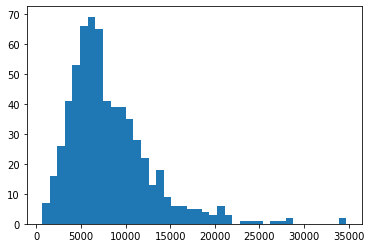

In [23]:
plt.hist(corpus_sizes, bins=40)
plt.show()

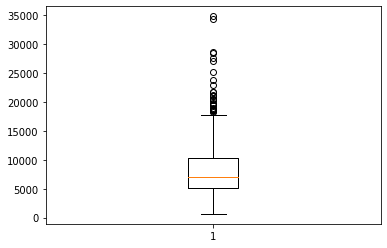

In [25]:
plt.boxplot(corpus_sizes)
plt.show()

---

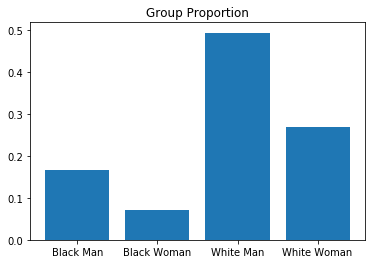

In [26]:
df = pd.read_csv("../data/download_descriptions.csv")

data = df.groupby("group").movie.count()
plt.bar(data.index, data.values/df.shape[0])
plt.title("Group Proportion")
plt.show()